# Beating the IQ Tester

In [1]:
# TODO : find way to make triangle with variable size

In [1]:
import numpy as np

grid = [
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 1]]
grid = np.array(grid)

In [3]:
grid[(0,4)]

1

In [7]:
np.where(grid > 0)

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 array([4, 3, 5, 2, 4, 6, 1, 3, 5, 7, 0, 2, 4, 6, 8]))

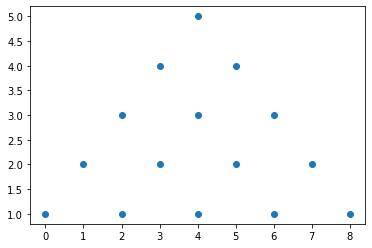

In [14]:
import matplotlib.pyplot as plt
plt.scatter(8 - np.where(grid > 0)[1], 5 - np.where(grid > 0)[0])

In [15]:
# TODO: Function that calculates all possible moves given a certain configuration
# TODO: find suitable way for best sequence of moves

## Move Class

This struct describes a move on the board.
Each move is described by :
+ pin : the pin that will be moved
+ pin_dst: destination of the pin 

In [16]:
x = {(1,1) : (0,4) }
x[(1,1)]

(0, 4)

In [16]:
class Move():
    translate_move = {(1,1):(0,4), 
                      (2,1):(1,3), (2,2):(1,5),
                      (3,1):(2,2), (3,2):(2,4), (3,3):(2,6),
                      (4,1):(3,1), (4,2):(3,3), (4,3):(3,5), (4,4):(3,7),
                      (5,1):(4,0), (5,2):(4,2), (5,3):(4,4), (5,4):(4,6), (5,5):(4,8)}
    def __init__(self, pin_src, pin_dst):
        self.pin_src = self.translate_move[pin_src]
        if pin_dst is not None:
            self.pin_dst = self.translate_move[pin_dst]
        else: 
            self.pin_dst = pin_dst
        


## GameBoard Class

This class describes the board of the game.

The class shoud have the following methods and members:
+ plot() : plots the game board
+ config : current configuration of the board (position of the pins)
+ next_moves(): returns a list with all the possible next moves


In [70]:
import numpy as np
import matplotlib.pyplot as plt

class GameBoard():
    grid =[[0, 0, 0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 1, 0, 0, 0],
           [0, 0, 1, 0, 1, 0, 1, 0, 0],
           [0, 1, 0, 1, 0, 1, 0, 1, 0],
           [1, 0, 1, 0, 1, 0, 1, 0, 1]]
    def __init__(self):
        self.grid =[[0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 1, 0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 1, 0, 1, 0, 0],
                   [0, 1, 0, 1, 0, 1, 0, 1, 0],
                   [1, 0, 1, 0, 1, 0, 1, 0, 1]]
        self.grid = np.array(self.grid)
    
    def show_board(self):
        """
        plots the game board as a scatter plot
        """
        plt.scatter( np.where(self.grid > 0)[1], 5 - np.where(self.grid > 0)[0], s=200, c='g')
        plt.xlim([-1, 9])
        plt.ylim([0, 6])
        
    def remaining_pins(self):
        """
        returns the number of remaining pins
        """
        return np.sum(self.grid)
        
    def valid_move(self, move):
        """
        checks if a move is valid
        """
        # the first move
        print("source : ", move.pin_src, "=", self.grid[move.pin_src])
        print("destination : ", move.pin_dst,  "=", self.grid[move.pin_dst])
        if self.remaining_pins() == 15:
            if (move.pin_dst == None):
                return True
            else:
                return False
                
        # not a first move
        if self.grid[move.pin_dst] == 0 :
            return True
        return False
    def do_move(self, move):
        """
        excecutes a move on game board
        """
        if not self.valid_move(move):
            print("INVALID MOVE!")
            return
        pin_src = move.pin_src
        pin_dst = move.pin_dst
        
        self.grid[pin_src] = 0
        if pin_dst is not None:
            self.grid[pin_dst] = 1
    
    def next_moves(self):
        pass

15

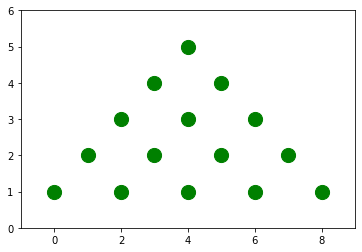

In [71]:
game = GameBoard()
game.show_board()
game.remaining_pins()



source :  (0, 4) = 1
destination :  None = [[[0 0 0 0 1 0 0 0 0]
  [0 0 0 1 0 1 0 0 0]
  [0 0 1 0 1 0 1 0 0]
  [0 1 0 1 0 1 0 1 0]
  [1 0 1 0 1 0 1 0 1]]]


14

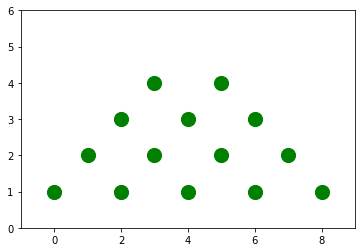

In [72]:
game.do_move(Move((1,1), None))
game.show_board()
game.remaining_pins()

source :  (2, 6) = 1
destination :  (0, 4) = 0


14

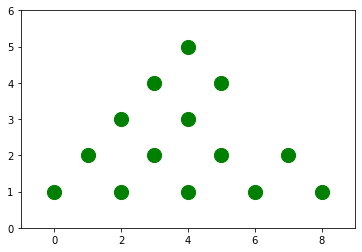

In [73]:
game.do_move(Move((3,3), (1,1)))
game.show_board()
game.remaining_pins()

In [74]:
game.grid[(0,4)]

1

source :  (0, 4) = 1
destination :  (1, 3) = 1
INVALID MOVE!


14

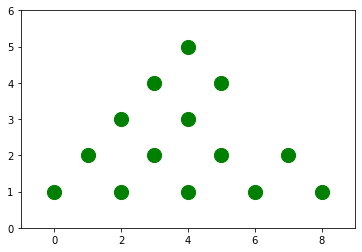

In [75]:
game.do_move(Move((1,1), (2,1)))
game.show_board()
game.remaining_pins()